Found 13416 images belonging to 2 classes.
Found 4235 images belonging to 2 classes.
9406464/9406464 [==============================] - 22s 2us/step
Epoch 1/10
420/420 [==============================] - 1321s 3s/step - loss: 0.6576 - accuracy: 0.6167 - val_loss: 0.6401 - val_accuracy: 0.6314
Epoch 2/10
420/420 [==============================] - 1499s 4s/step - loss: 0.5813 - accuracy: 0.6898 - val_loss: 0.6732 - val_accuracy: 0.5823
Epoch 3/10
420/420 [==============================] - 1616s 4s/step - loss: 0.5649 - accuracy: 0.7095 - val_loss: 0.6093 - val_accuracy: 0.6697
Epoch 4/10
420/420 [==============================] - 3047s 7s/step - loss: 0.5475 - accuracy: 0.7224 - val_loss: 0.6126 - val_accuracy: 0.6579
Epoch 5/10
420/420 [==============================] - 995s 2s/step - loss: 0.5377 - accuracy: 0.7317 - val_loss: 0.6206 - val_accuracy: 0.6451
Epoch 6/10
420/420 [==============================] - 3737s 9s/step - loss: 0.5287 - accuracy: 0.7361 - val_loss: 0.5980 - val_accur

C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


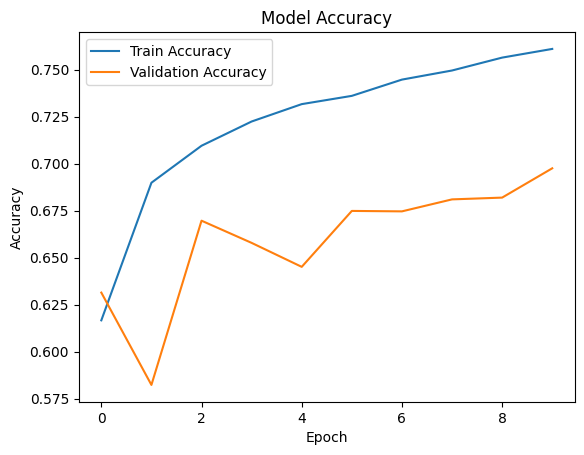

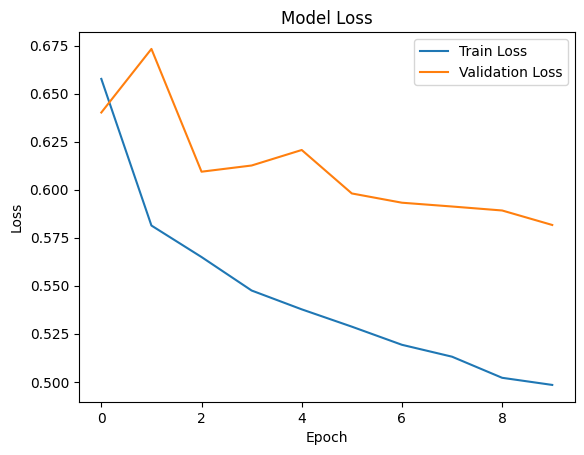

In [2]:
import sys
import io
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


# Paths to Hilbert spectrum image folders
train_data_path = "D:/datasets/Hilbert_spectrum"
dysarthric_folder = os.path.join(train_data_path, "dysarthric")
non_dysarthric_folder = os.path.join(train_data_path, "non_dysarthric")

# Create directories for training and validation sets
train_dir = os.path.join(train_data_path, 'train')
val_dir = os.path.join(train_data_path, 'val')

# Function to split data and create train/val folders if they don't exist
def split_data(source_folder, train_folder, val_folder, split_ratio=0.8):
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    
    # Get list of all files in the source folder
    files = [f for f in os.listdir(source_folder) if f.endswith('.png')]
    train_files, val_files = train_test_split(files, train_size=split_ratio, random_state=42)

    # Copy files to train folder
    for file in train_files:
        shutil.copy(os.path.join(source_folder, file), os.path.join(train_folder, file))

    # Copy files to val folder
    for file in val_files:
        shutil.copy(os.path.join(source_folder, file), os.path.join(val_folder, file))

# Split data for both classes
split_data(dysarthric_folder, os.path.join(train_dir, 'dysarthric'), os.path.join(val_dir, 'dysarthric'))
split_data(non_dysarthric_folder, os.path.join(train_dir, 'non_dysarthric'), os.path.join(val_dir, 'non_dysarthric'))

# Define the image data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators for train and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with progress tracking
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

# Evaluate the model on the validation set
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.round(predictions).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(val_generator.classes, predicted_classes))

# Save the model
model.save("dysarthric_classifier_mobilenet_model.h5")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Found 13416 images belonging to 2 classes.
Found 4235 images belonging to 2 classes.
Epoch 1/10
420/420 [==============================] - ETA: 0s - loss: 0.7748 - accuracy: 0.6062

C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


420/420 [==============================] - 1406s 3s/step - loss: 0.7748 - accuracy: 0.6062 - val_loss: 0.6812 - val_accuracy: 0.6090 - lr: 1.0000e-04
Epoch 2/10
420/420 [==============================] - 1238s 3s/step - loss: 0.6864 - accuracy: 0.6521 - val_loss: 0.6452 - val_accuracy: 0.6437 - lr: 1.0000e-04
Epoch 3/10
420/420 [==============================] - 1093s 3s/step - loss: 0.6442 - accuracy: 0.6673 - val_loss: 0.6373 - val_accuracy: 0.6477 - lr: 1.0000e-04
Epoch 4/10
420/420 [==============================] - 1060s 3s/step - loss: 0.6267 - accuracy: 0.6780 - val_loss: 0.6219 - val_accuracy: 0.6715 - lr: 1.0000e-04
Epoch 5/10
420/420 [==============================] - 1550s 4s/step - loss: 0.6041 - accuracy: 0.6852 - val_loss: 0.6073 - val_accuracy: 0.6704 - lr: 1.0000e-04
Epoch 6/10
420/420 [==============================] - 2293s 5s/step - loss: 0.5966 - accuracy: 0.6939 - val_loss: 0.6108 - val_accuracy: 0.6751 - lr: 1.0000e-04
Epoch 7/10
420/420 [=========================

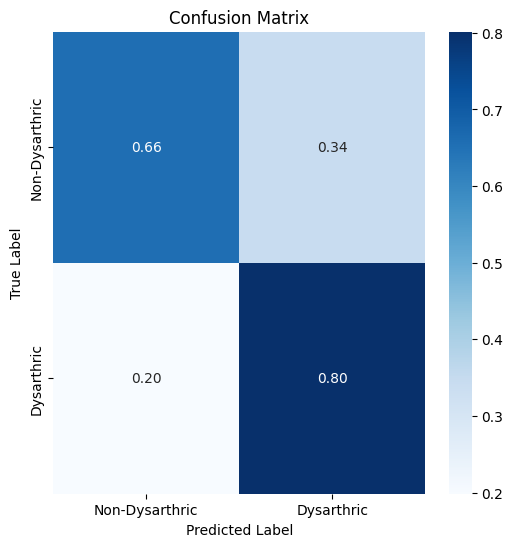

C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


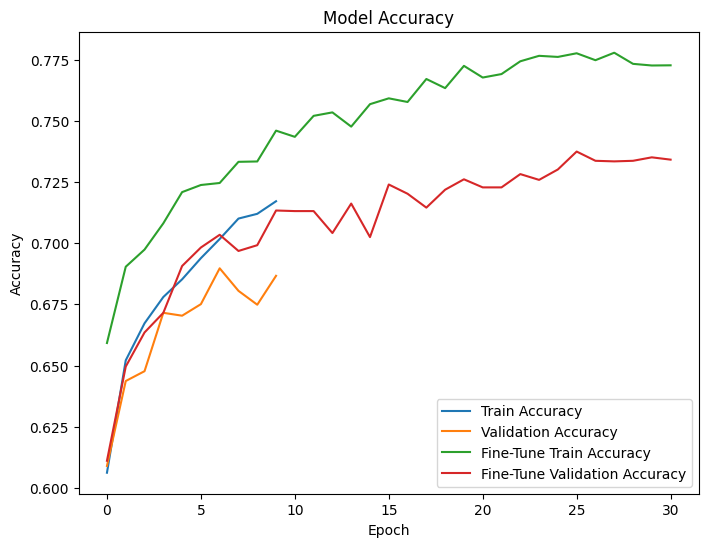

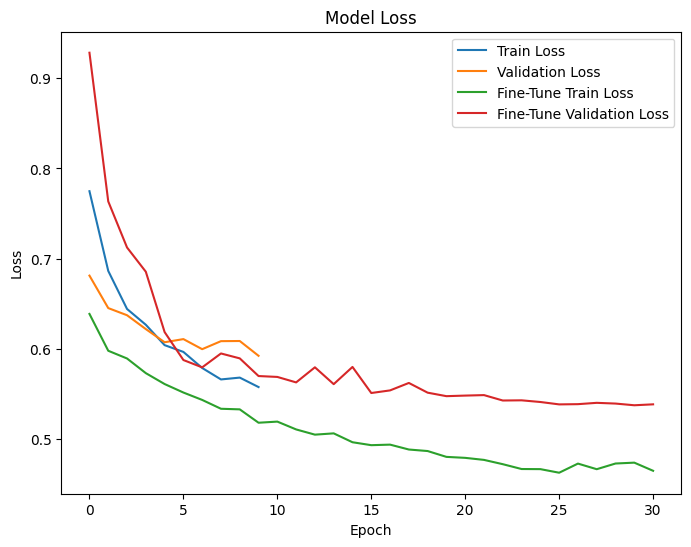

In [3]:
import sys
import io
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Paths to Hilbert spectrum image folders
train_data_path = "D:/datasets/Hilbert_spectrum"
dysarthric_folder = os.path.join(train_data_path, "dysarthric")
non_dysarthric_folder = os.path.join(train_data_path, "non_dysarthric")

# Create directories for training and validation sets
train_dir = os.path.join(train_data_path, 'train')
val_dir = os.path.join(train_data_path, 'val')

# Function to split data and create train/val folders if they don't exist
def split_data(source_folder, train_folder, val_folder, split_ratio=0.8):
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    
    # Get list of all files in the source folder
    files = [f for f in os.listdir(source_folder) if f.endswith('.png')]
    train_files, val_files = train_test_split(files, train_size=split_ratio, random_state=42)

    # Copy files to train folder
    for file in train_files:
        shutil.copy(os.path.join(source_folder, file), os.path.join(train_folder, file))

    # Copy files to val folder
    for file in val_files:
        shutil.copy(os.path.join(source_folder, file), os.path.join(val_folder, file))

# Split data for both classes
split_data(dysarthric_folder, os.path.join(train_dir, 'dysarthric'), os.path.join(val_dir, 'dysarthric'))
split_data(non_dysarthric_folder, os.path.join(train_dir, 'non_dysarthric'), os.path.join(val_dir, 'non_dysarthric'))

# Define the image data generator with enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators for train and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model initially
base_model.trainable = False

# Build the model with BatchNormalization
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_dysarthric_classifier_model.h5", 
                                   monitor='val_loss', 
                                   save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              min_lr=1e-6)
callbacks_list = [early_stop, model_checkpoint, reduce_lr]

# Train the model with class weights and callbacks
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    class_weight=class_weights_dict
)

# Fine-tuning: Unfreeze some layers and continue training
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Continue training
fine_tune_epochs = 30
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=callbacks_list,
    class_weight=class_weights_dict
)

# Evaluate the model on the validation set
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.round(predictions).astype(int).ravel()

# Print classification report
print("Classification Report:")
print(classification_report(val_generator.classes, predicted_classes, target_names=['Non-Dysarthric', 'Dysarthric']))

# Compute and plot confusion matrix
cm = confusion_matrix(val_generator.classes, predicted_classes)
cm_norm = confusion_matrix(val_generator.classes, predicted_classes, normalize='true')

plt.figure(figsize=(6,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Blues', 
            xticklabels=['Non-Dysarthric', 'Dysarthric'], 
            yticklabels=['Non-Dysarthric', 'Dysarthric'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Save the final model
model.save("dysarthric_classifier_mobilenet_model_final.h5")

# Plot training & validation accuracy values
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-Tune Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tune Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-Tune Train Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-Tune Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Found 13210 files belonging to 2 classes.
Loaded 13210 images with shape (128, 128, 3)

==================== Fold 1 ====================
Epoch 1/20
330/331 [============================>.] - ETA: 0s - loss: 0.6886 - accuracy: 0.5730
Epoch 1: val_accuracy improved from -inf to 0.68244, saving model to best_model_fold1.h5


C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


331/331 [==============================] - 44s 116ms/step - loss: 0.6885 - accuracy: 0.5730 - val_loss: 0.6104 - val_accuracy: 0.6824
Epoch 2/20
330/331 [============================>.] - ETA: 0s - loss: 0.6067 - accuracy: 0.6694
Epoch 2: val_accuracy improved from 0.68244 to 0.72521, saving model to best_model_fold1.h5
331/331 [==============================] - 36s 110ms/step - loss: 0.6066 - accuracy: 0.6696 - val_loss: 0.5694 - val_accuracy: 0.7252
Epoch 3/20
330/331 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.7015
Epoch 3: val_accuracy improved from 0.72521 to 0.73770, saving model to best_model_fold1.h5
331/331 [==============================] - 36s 110ms/step - loss: 0.5750 - accuracy: 0.7016 - val_loss: 0.5470 - val_accuracy: 0.7377
Epoch 4/20
330/331 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7230
Epoch 4: val_accuracy improved from 0.73770 to 0.75170, saving model to best_model_fold1.h5
331/331 [=========================

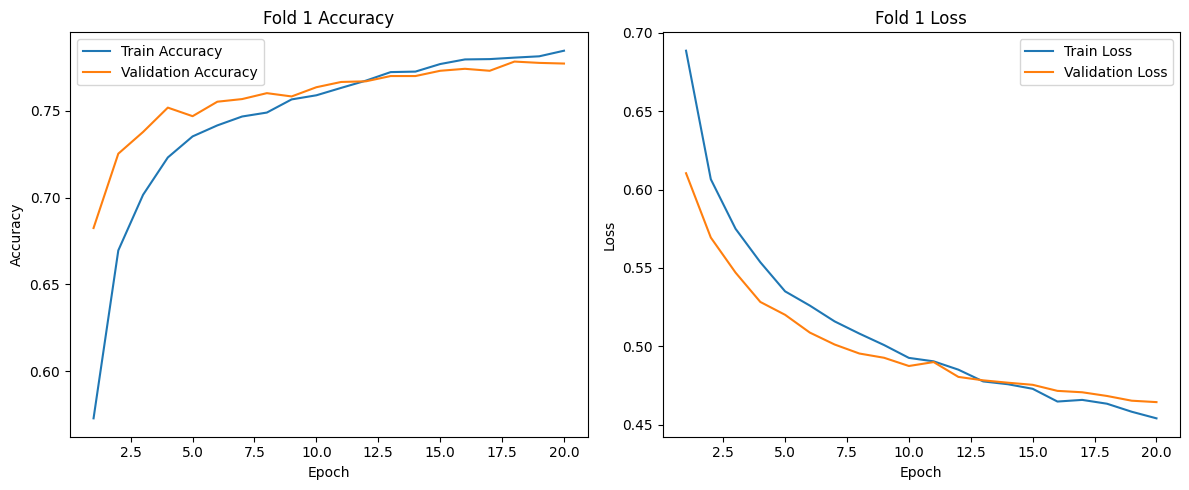

83/83 [==============================] - 12s 117ms/step


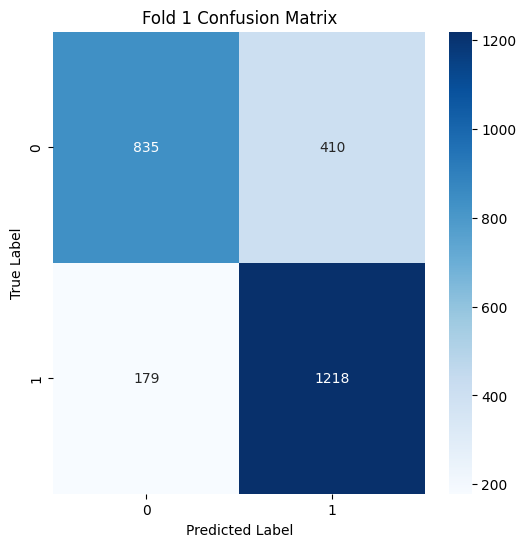


==================== Fold 2 ====================
Epoch 1/20
331/331 [==============================] - ETA: 0s - loss: 0.6604 - accuracy: 0.6100
Epoch 1: val_accuracy improved from -inf to 0.69985, saving model to best_model_fold2.h5


C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


331/331 [==============================] - 61s 157ms/step - loss: 0.6604 - accuracy: 0.6100 - val_loss: 0.5886 - val_accuracy: 0.6998
Epoch 2/20
331/331 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.6834
Epoch 2: val_accuracy improved from 0.69985 to 0.72748, saving model to best_model_fold2.h5
331/331 [==============================] - 48s 145ms/step - loss: 0.5927 - accuracy: 0.6834 - val_loss: 0.5584 - val_accuracy: 0.7275
Epoch 3/20
331/331 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.7108
Epoch 3: val_accuracy improved from 0.72748 to 0.73429, saving model to best_model_fold2.h5
331/331 [==============================] - 50s 150ms/step - loss: 0.5629 - accuracy: 0.7108 - val_loss: 0.5394 - val_accuracy: 0.7343
Epoch 4/20
331/331 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.7245
Epoch 4: val_accuracy improved from 0.73429 to 0.74035, saving model to best_model_fold2.h5
331/331 [=========================

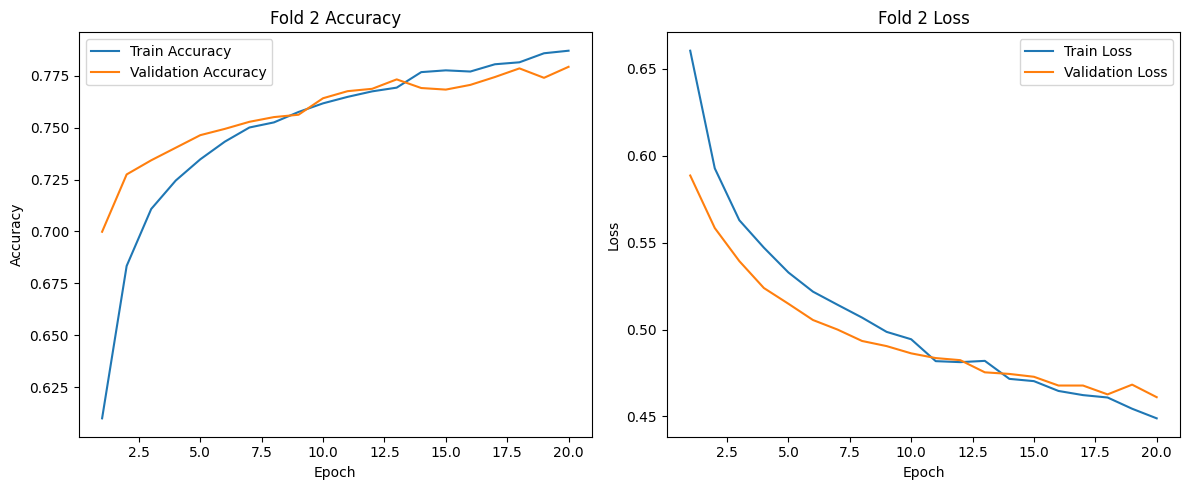

83/83 [==============================] - 6s 57ms/step


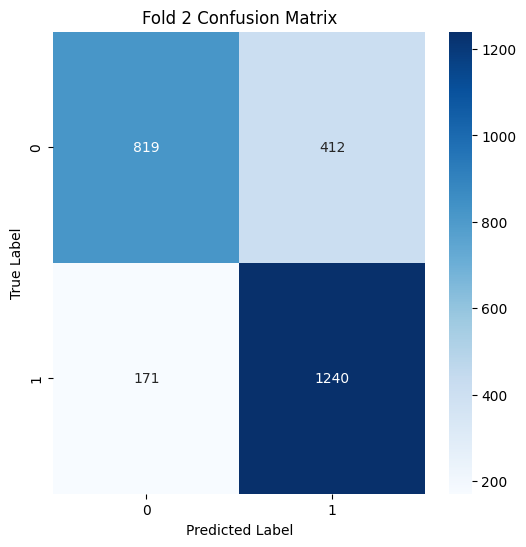


==================== Fold 3 ====================
Epoch 1/20
330/331 [============================>.] - ETA: 0s - loss: 0.6949 - accuracy: 0.5944
Epoch 1: val_accuracy improved from -inf to 0.69266, saving model to best_model_fold3.h5


C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


331/331 [==============================] - 43s 111ms/step - loss: 0.6949 - accuracy: 0.5944 - val_loss: 0.5946 - val_accuracy: 0.6927
Epoch 2/20
331/331 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.6776
Epoch 2: val_accuracy improved from 0.69266 to 0.73391, saving model to best_model_fold3.h5
331/331 [==============================] - 47s 143ms/step - loss: 0.6046 - accuracy: 0.6776 - val_loss: 0.5597 - val_accuracy: 0.7339
Epoch 3/20
331/331 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7056
Epoch 3: val_accuracy improved from 0.73391 to 0.73959, saving model to best_model_fold3.h5
331/331 [==============================] - 58s 175ms/step - loss: 0.5694 - accuracy: 0.7056 - val_loss: 0.5356 - val_accuracy: 0.7396
Epoch 4/20
330/331 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7259
Epoch 4: val_accuracy improved from 0.73959 to 0.75700, saving model to best_model_fold3.h5
331/331 [=========================

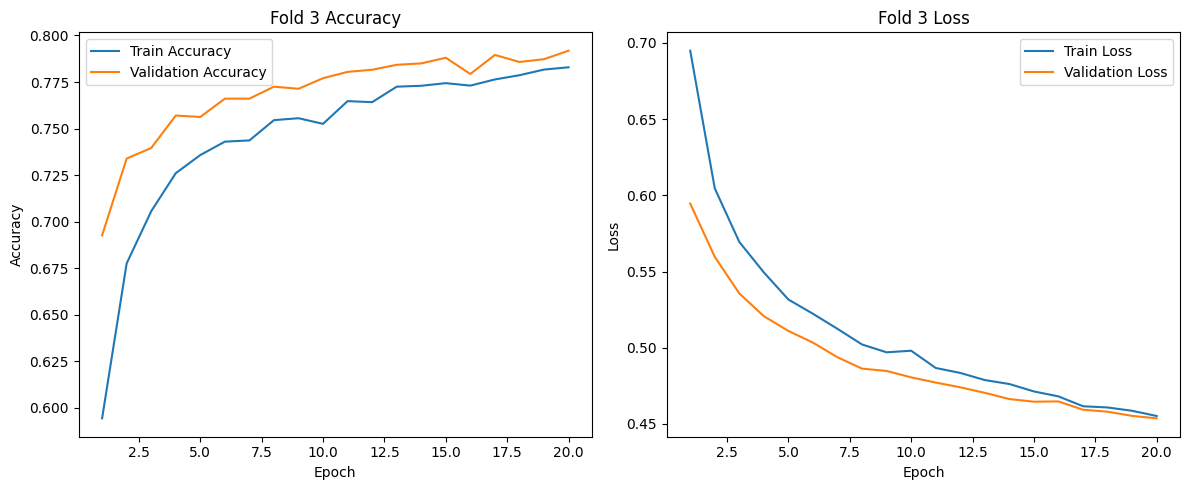

83/83 [==============================] - 23s 190ms/step


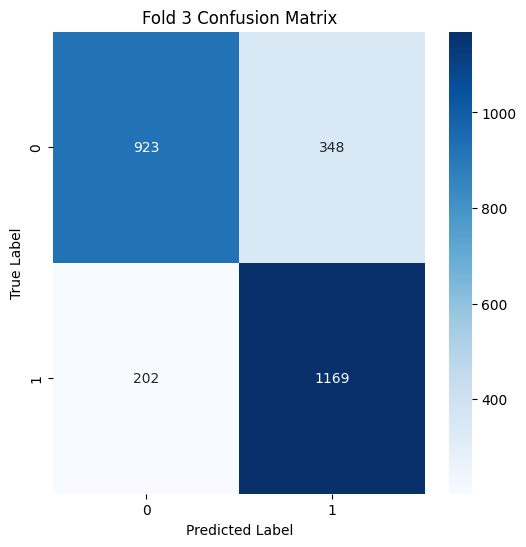


==================== Fold 4 ====================
Epoch 1/20
331/331 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.5826
Epoch 1: val_accuracy improved from -inf to 0.69569, saving model to best_model_fold4.h5


C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


331/331 [==============================] - 110s 265ms/step - loss: 0.7009 - accuracy: 0.5826 - val_loss: 0.5968 - val_accuracy: 0.6957
Epoch 2/20
331/331 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.6842
Epoch 2: val_accuracy improved from 0.69569 to 0.72483, saving model to best_model_fold4.h5
331/331 [==============================] - 161s 486ms/step - loss: 0.5947 - accuracy: 0.6842 - val_loss: 0.5608 - val_accuracy: 0.7248
Epoch 3/20
331/331 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.7101
Epoch 3: val_accuracy improved from 0.72483 to 0.73656, saving model to best_model_fold4.h5
331/331 [==============================] - 58s 174ms/step - loss: 0.5653 - accuracy: 0.7101 - val_loss: 0.5387 - val_accuracy: 0.7366
Epoch 4/20
331/331 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.7282
Epoch 4: val_accuracy improved from 0.73656 to 0.74489, saving model to best_model_fold4.h5
331/331 [=======================

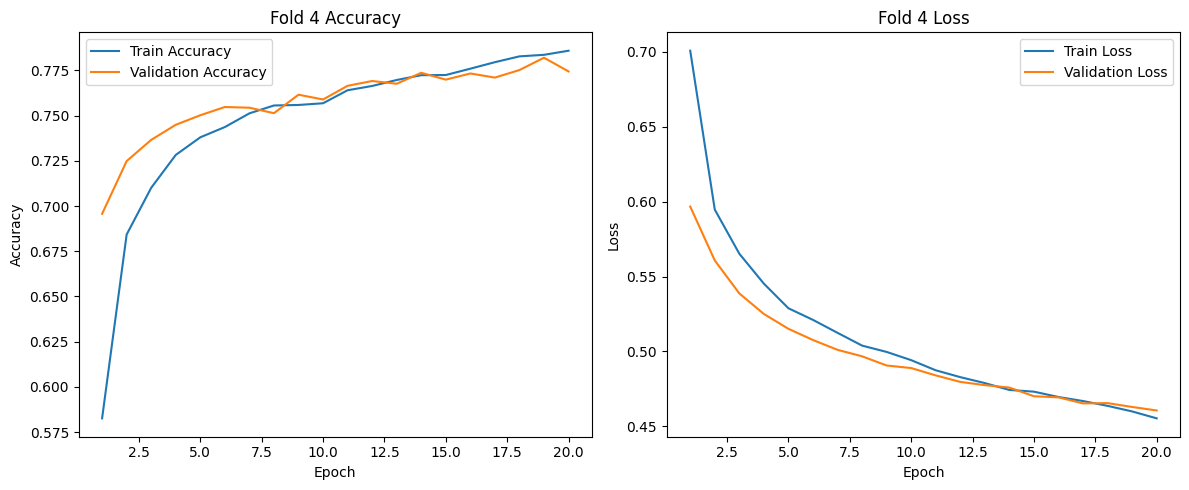

83/83 [==============================] - 29s 220ms/step


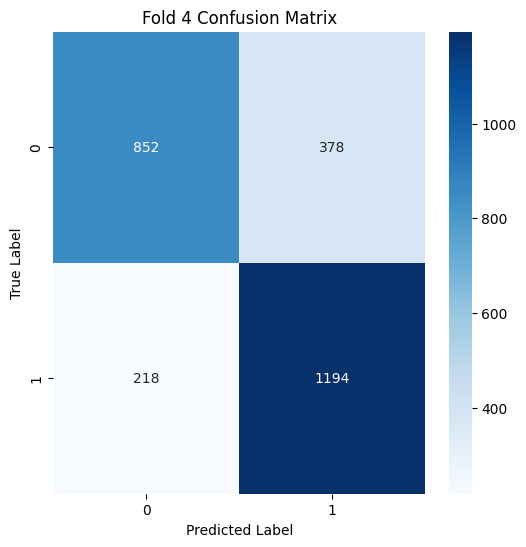


==================== Fold 5 ====================
Epoch 1/20
331/331 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.5940
Epoch 1: val_accuracy improved from -inf to 0.70212, saving model to best_model_fold5.h5


C:\Users\capta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


331/331 [==============================] - 154s 341ms/step - loss: 0.6794 - accuracy: 0.5940 - val_loss: 0.5957 - val_accuracy: 0.7021
Epoch 2/20
331/331 [==============================] - ETA: 0s - loss: 0.5992 - accuracy: 0.6776
Epoch 2: val_accuracy improved from 0.70212 to 0.73013, saving model to best_model_fold5.h5
331/331 [==============================] - 108s 328ms/step - loss: 0.5992 - accuracy: 0.6776 - val_loss: 0.5610 - val_accuracy: 0.7301
Epoch 3/20
331/331 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7118
Epoch 3: val_accuracy improved from 0.73013 to 0.73732, saving model to best_model_fold5.h5
331/331 [==============================] - 89s 268ms/step - loss: 0.5660 - accuracy: 0.7118 - val_loss: 0.5405 - val_accuracy: 0.7373
Epoch 4/20
331/331 [==============================] - ETA: 0s - loss: 0.5477 - accuracy: 0.7267
Epoch 4: val_accuracy did not improve from 0.73732
331/331 [==============================] - 91s 275ms/step - loss: 0.5477 

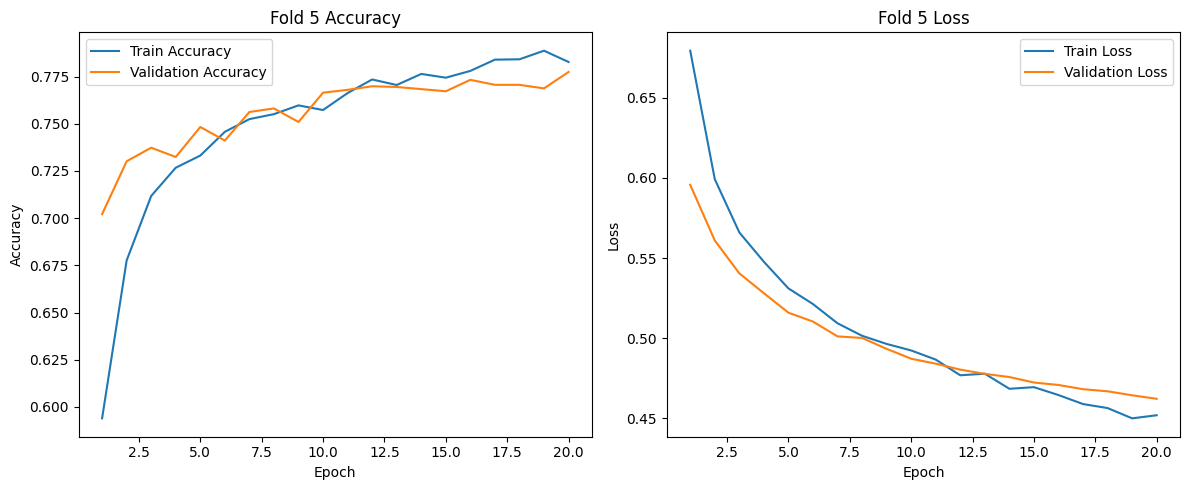

83/83 [==============================] - 21s 174ms/step


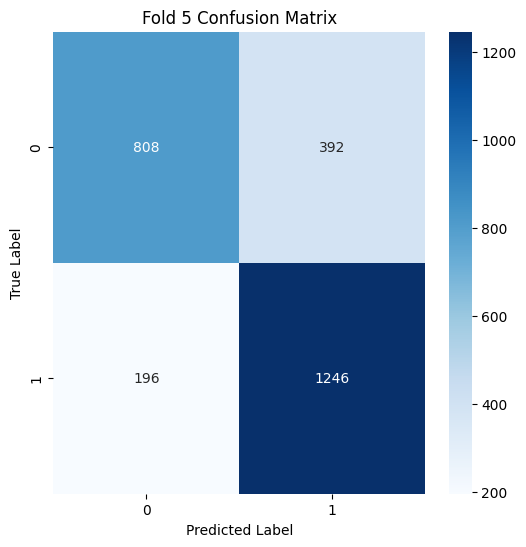


Average scores for all folds:
Average Accuracy: 78.00% (+- 0.61)
Average Loss: 0.4604


: 

In [1]:

import os
import tensorflow as tf
from tensorflow.keras import layers, models, applications, callbacks
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# -----------------------------------------------------------------------------
# 1. Data Loading from Directory
# -----------------------------------------------------------------------------
# Specify the path to the parent directory containing class subdirectories.
data_dir = "D:/datasets/Hilbert_spectrum"

# Load the dataset using image_dataset_from_directory.
# Ensure that the folder structure is:
#   D:/datasets/Hilbert_spectrum/dysarthric
#   D:/datasets/Hilbert_spectrum/non_dysarthric
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",   # binary labels for dysarthric vs. non-dysarthric
    image_size=(128, 128),
    batch_size=32,
    shuffle=False  # Set shuffle=False to ensure consistent ordering for KFold splitting
)

# Convert the tf.data.Dataset to NumPy arrays.
# (This is appropriate if the dataset fits in memory.)
X_list = []
y_list = []
for images, labels in dataset:
    X_list.append(images.numpy())
    y_list.append(labels.numpy())

X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}")

# -----------------------------------------------------------------------------
# 2. Define the MobileNetV3Small-based Model
# -----------------------------------------------------------------------------
def build_model(input_shape=(128, 128, 3)):
    # Use MobileNetV3Small with pretrained ImageNet weights; exclude the top classification layers.
    base_model = applications.MobileNetV3Small(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    # Freeze the base model for transfer learning
    base_model.trainable = False

    # Build a custom classification head
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    # Final layer for binary classification using sigmoid activation
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# -----------------------------------------------------------------------------
# 3. K-Fold Cross-Validation Setup
# -----------------------------------------------------------------------------
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, val_index in kf.split(X):
    print(f'\n{"="*20} Fold {fold_no} {"="*20}')
    
    # Split the data into training and validation sets for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Build a new instance of the model for this fold
    model = build_model(input_shape=(128, 128, 3))
    
    # -----------------------------------------------------------------------------
    # Define Callbacks:
    # -----------------------------------------------------------------------------
    # ModelCheckpoint saves the best model in HDF5 format.
    checkpoint_cb = callbacks.ModelCheckpoint(
        filepath=f'best_model_fold{fold_no}.h5',  # using HDF5 to avoid native Keras format issues
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )
    # EarlyStopping stops training if validation loss does not improve.
    early_stop_cb = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    
    # -----------------------------------------------------------------------------
    # Train the Model
    # -----------------------------------------------------------------------------
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[checkpoint_cb, early_stop_cb],
        verbose=1
    )
    
    # -----------------------------------------------------------------------------
    # Evaluate the Model on the Validation Set
    # -----------------------------------------------------------------------------
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: Loss = {scores[0]:.4f}, Accuracy = {scores[1]*100:.2f}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # -----------------------------------------------------------------------------
    # Visualization: Accuracy and Loss Curves for this Fold
    # -----------------------------------------------------------------------------
    epochs_range = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Train Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # -----------------------------------------------------------------------------
    # Visualization: Confusion Matrix for this Fold
    # -----------------------------------------------------------------------------
    # Generate predictions on the validation set
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Fold {fold_no} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    fold_no += 1

# -----------------------------------------------------------------------------
# 4. Summary of Cross-Validation Performance
# -----------------------------------------------------------------------------
print("\n========================================")
print("Average scores for all folds:")
print(f"Average Accuracy: {np.mean(acc_per_fold):.2f}% (+- {np.std(acc_per_fold):.2f})")
print(f"Average Loss: {np.mean(loss_per_fold):.4f}")
print("========================================")
